In [46]:
# Dependencies and Setup
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from math import trunc

In [48]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [49]:
# File to Load and read
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

In [50]:
mouse_drug_data.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [51]:
# mouse_drug_type = mouse_drug_data[["Capomulin","Infubinol","Ketapril","Placebo"]]
# mouse_drug_type

In [52]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [53]:
# Combine the data into a single dataset
merge_data=pd.merge(mouse_drug_data, clinical_trial_data, on = "Mouse ID", how = "left")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [54]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_tumor_volume = merge_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
Mean_tumor_volume.head()


Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [55]:
# Convert to DataFrame
Tumor_response_df = pd.DataFrame(Mean_tumor_volume)

In [56]:
Tumor_response_df = Tumor_response_df.reset_index()

In [57]:
# Preview DataFrame
Tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [58]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_Tumor_response = Tumor_response_df.sem
SEM_Tumor_response


<bound method DataFrame.sem of          Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051
12   Ceftamin         10           48.285125
13   Ceftamin         15           50.094055
14   Ceftamin         20           52.157049
15   Ceftamin         25           54.287674
16   Ceftamin         30           56.769517
17   Ceftamin         35           58.827548
18   Ceftamin         40           61.467895
19   Ceftamin         45           64.132421
20  Infubinol          0

In [59]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_response = pd.pivot_table(merge_data, index='Timepoint', 
                                columns='Drug', 
                                values='Tumor Volume (mm3)',
                                aggfunc = np.mean)

# Preview that Reformatting worked
Tumor_response.head()
Tumor_response_type = Tumor_response[["Capomulin","Infubinol","Ketapril","Placebo"]]
Tumor_response_type.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [60]:
Tumor_volume = Tumor_response_type.mean()
Tumor_volume


Drug
Capomulin    40.485084
Infubinol    54.963549
Ketapril     56.806906
Placebo      56.012209
dtype: float64

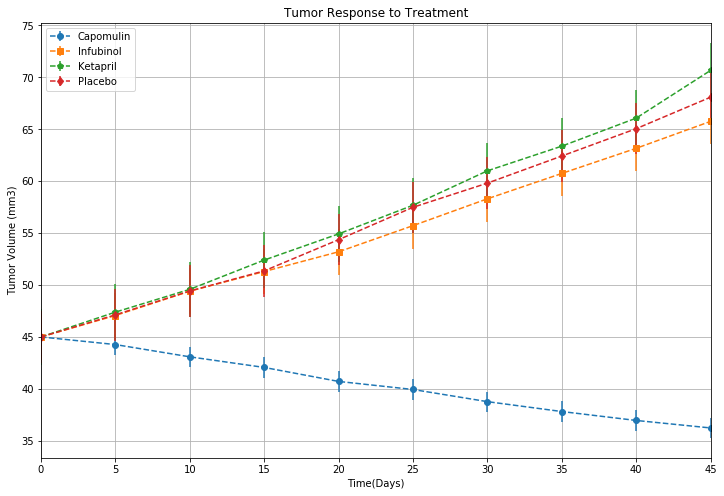

<Figure size 432x288 with 0 Axes>

In [61]:
# Generate the Plot (with Error Bars)
Timepoint = Tumor_response_type.index
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, Tumor_response['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")

plt.errorbar(Timepoint, Tumor_response['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Tumor_response['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")

plt.errorbar(Timepoint, Tumor_response['Placebo'],yerr=Tumor_response['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

# Save the Figure
plt.savefig("errorbar.png")

## Metastatic Response to Treatment

In [62]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_response_mean =  merge_data.groupby(['Drug','Timepoint']).mean()[['Metastatic Sites']]
Met_response_mean.head()

# Convert to DataFrame
Met_response_mean = pd.DataFrame(Met_response_mean)

# Preview DataFrame
Met_response_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [63]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_response_sem =  merge_data.groupby(['Drug','Timepoint']).sem()[['Metastatic Sites']]

# Convert to DataFrame
Met_response_sem = pd.DataFrame(Met_response_sem)

# Preview DataFrame
Met_response_sem.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [64]:
# Minor Data Munging to Re-Format the Data Frames
Met_response_mean = Met_response_mean.reset_index()
Met_response_pivot_mean = Met_response_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

Met_response_sem = Met_response_sem.reset_index()
Met_response_pivot_sem = Met_response_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
                                                                                             
# Preview that Reformatting worked
Met_response_pivot_mean.head()





Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


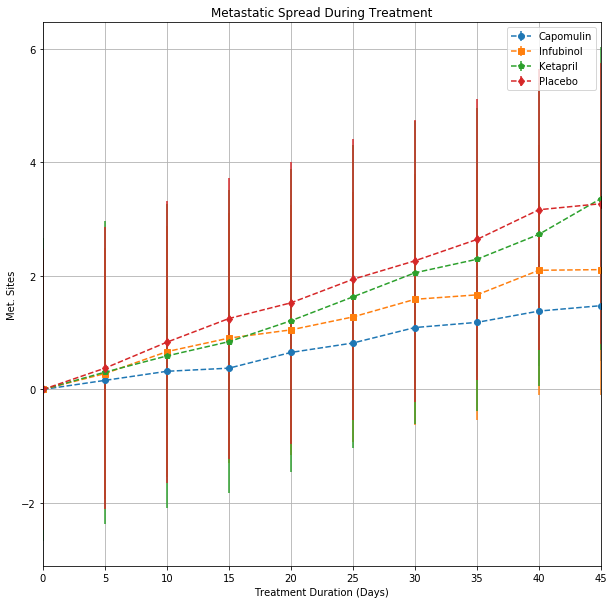

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate the Plot (with Error Bars)
Metastatic = Met_response_pivot_mean.index
plt.figure(figsize=(10,10))
plt.errorbar(Metastatic, Met_response_pivot_mean["Capomulin"],yerr=Tumor_response["Capomulin"].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Metastatic, Met_response_pivot_mean["Infubinol"],yerr=Tumor_response["Infubinol"].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Metastatic, Met_response_pivot_mean["Ketapril"],yerr=Tumor_response["Ketapril"].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Metastatic, Met_response_pivot_mean["Placebo"],yerr=Tumor_response["Placebo"].sem(), marker ='d', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment' ,xlim = (0,max(Metastatic)))
plt.legend(loc ="best", fontsize = "medium", frameon=True)
plt.grid()
plt.show()

# Save the Figure
plt.savefig("errorbar.png")


In [84]:
# Save the Figure
plt.savefig("metastatic.png")

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [107]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count =  merge_data.groupby(['Drug','Timepoint']).count()[['Mouse ID']]
mouse_count.head()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

In [108]:
# Preview DataFrame
mouse_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [109]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_Data = pd.pivot_table(mouse_count, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)

# Preview the Data Frame
Mouse_Data.head()
Mouse_Data_type = Mouse_Data[["Capomulin","Infubinol","Ketapril","Placebo"]]
Mouse_Data_type

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [110]:
Survival_percent = Mouse_Data_type.copy()
Survival_percent = round(Survival_percent.apply(lambda c: c / c.max() * 100, axis=0),2)

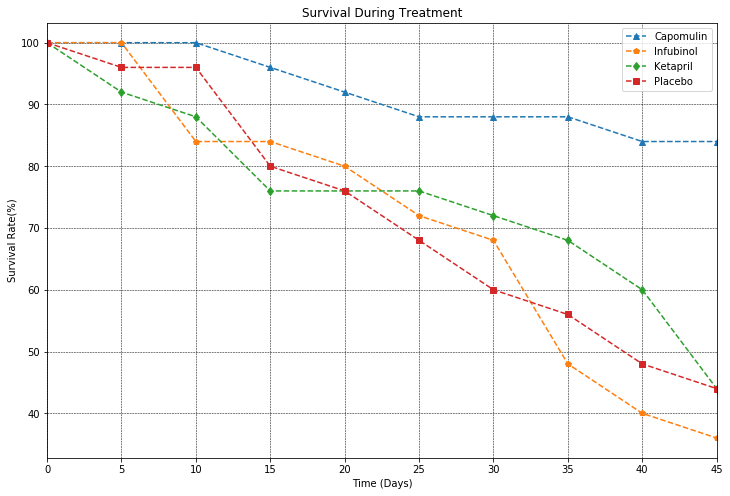

In [111]:
# Generate the Plot (Accounting for percentages)
Survival_rate =  Survival_percent.index
plt.figure(figsize=(12,8))

plt.plot(Survival_rate, Survival_percent['Capomulin'], marker ='^', linestyle='--', label="Capomulin")

plt.plot(Survival_rate, Survival_percent['Infubinol'], marker ='p', linestyle='--', label="Infubinol")
plt.plot(Survival_rate, Survival_percent['Ketapril'], marker ='d', linestyle='--', label="Ketapril")

plt.plot(Survival_rate, Survival_percent['Placebo'], marker ='s', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (0,max(Survival_rate)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

#Capomulin, Infubinol, Ketapril, and Placebo


In [112]:
# Save the Figure
plt.savefig("survival_rate.png")

<Figure size 432x288 with 0 Axes>

## Summary Bar Graph

In [135]:
# Calculate the percent changes for each drug
Drug_Change_Percent = (((Tumor_response.iloc[-1]-Tumor_response.iloc[0])/Tumor_response.iloc[0])*100)

Drug_Change_Percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

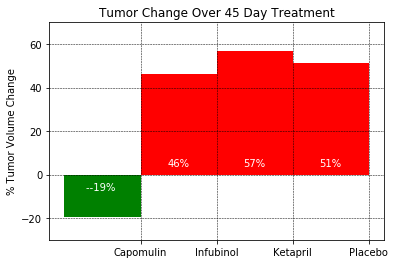

In [139]:
PCT_changes = (Drug_Change_Percent["Capomulin"], 
               Drug_Change_Percent["Infubinol"], 
               Drug_Change_Percent["Ketapril"], 
               Drug_Change_Percent["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(PCT_changes))  
width = 1
rectsPass = ax.bar(ind[0], PCT_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], PCT_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

        # Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
#fig.savefig("analysis/Fig4.png")

# Show the Figure
fig.show()


In [ ]:
OBSERVATIONS
1. Mice that were administered Capomulin had the highest survival rate durng treatment.
2. Metastatic sites spread on the mice was lowest with the Capomulin durung treatment period.
3. The tumor response volume was lowest with the adminstation of Capomulin.